In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from lifelines.datasets import load_waltons

df = load_waltons()
df

,T,E,group
0,6.0,1,miR-137
1,13.0,1,miR-137
2,13.0,1,miR-137
3,13.0,1,miR-137
4,19.0,1,miR-137
...,...,...,...
158,60.0,1,control
159,60.0,1,control
160,60.0,1,control
161,60.0,1,control


In [6]:
T = df['T']
E = df['E'] # 是否死亡

In [7]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 163 total observations, 7 right-censored observations>

In [4]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
6.0,0.993865
7.0,0.987730
9.0,0.969210
13.0,0.950690
15.0,0.938344
17.0,0.932170
19.0,0.913650
22.0,0.888957


In [5]:
kmf.cumulative_density_

,KM_estimate
timeline,
0.0,0.000000
6.0,0.006135
7.0,0.012270
9.0,0.030790
13.0,0.049310
15.0,0.061656
17.0,0.067830
19.0,0.086350
22.0,0.111043


<Axes: xlabel='timeline'>

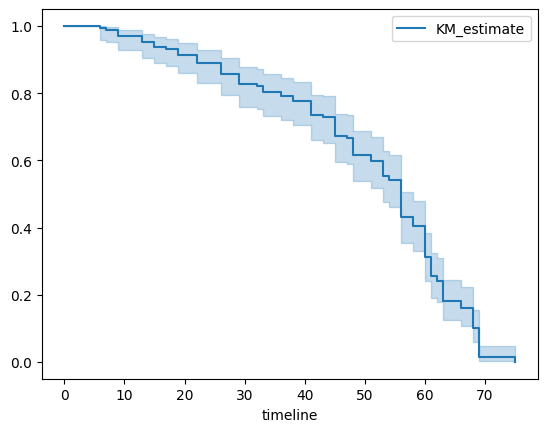

In [6]:
kmf.plot_survival_function()

In [9]:
from lifelines.utils import median_survival_times

median_ = kmf.median_survival_time_
print(median_)
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)
print(median_confidence_interval_)

56.0
     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                    53.0                    58.0


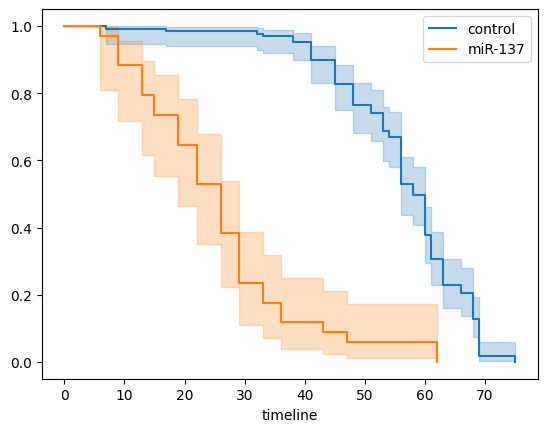

In [8]:
# 多个组
groups = df['group']
ix = (groups == 'miR-137')

kmf.fit(T[~ix], E[~ix], label='control')
ax = kmf.plot_survival_function()

kmf.fit(T[ix], E[ix], label='miR-137')
ax = kmf.plot_survival_function(ax=ax)

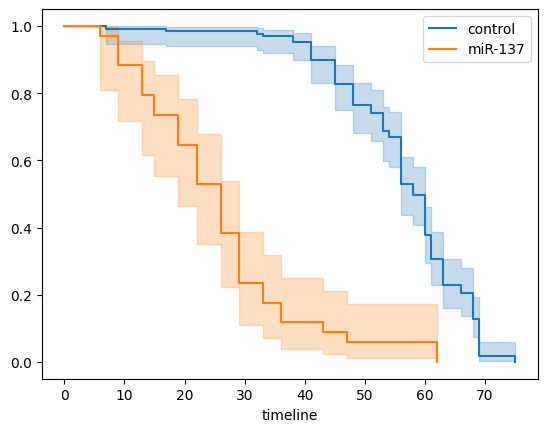

In [10]:
import matplotlib.pyplot as plt

ax = plt.subplot(111)

kmf = KaplanMeierFitter()

for name, grouped_df in df.groupby('group'):
    kmf.fit(grouped_df['T'], grouped_df['E'], label=name)
    kmf.plot_survival_function(ax=ax)

In [11]:
# 比较两个生存函数
from lifelines.statistics import logrank_test

results = logrank_test(T[ix], T[~ix], E[ix], E[~ix], alpha=0.99)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         122.25 <0.005     91.99

In [20]:
# Cox风险比例模型
from lifelines.datasets import load_rossi

rossi = load_rossi()
rossi
# week持续时间，arrest事件

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3
...,...,...,...,...,...,...,...,...,...
427,52,0,1,31,0,1,0,1,3
428,52,0,0,20,1,0,0,1,1
429,52,0,1,20,1,1,1,1,1
430,52,0,0,29,1,1,0,1,3


In [21]:
rossi.shape

(432, 9)

In [46]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(rossi, duration_col='week', event_col='arrest')
cph.print_summary(decimals=4)
# -log2(p) of ll-ratio test是似然比检验（Likelihood Ratio Test LRT）结果的度量，p值表示模型中所有协变量联合显著性的概率值，-log2(p)值越高，表示模型中的协变量对结果的联合影响越显著

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.7477
         time fit was run = 2025-01-23 02:18:56 UTC

---
             coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                    
fin       -0.3794    0.6843    0.1914         -0.7545         -0.0043              0.4702              0.9957
age       -0.0574    0.9442    0.0220         -0.1006         -0.0143              0.9043              0.9858
race       0.3139    1.3688    0.3080         -0.2898          0.9176              0.7484              2.5032
wexp      -0.1498    0.8609    0.2122         -0.5657          0.2662              0.5679              1.3049
mar       -0.4337    0.6481    0.3819         -1.1822          0.3147              0.3066              1.3699
paro      -0.0849    0.9186    0.1958         -0.4685          0.2988              0.6259              1.3482
prio       0.0915    1.0958    0.0286          0.0353          0.1476              1.0360              1.1591

           cmp to       z      p  -log2(p)
covariate                                 
fin        0.0000 -1.9826 0.0474    4.3985
age        0.0000 -2.6109 0.0090    6.7909
race       0.0000  1.0192 0.3081    1.6984
wexp       0.0000 -0.7058 0.4803    1.0580
mar        0.0000 -1.1357 0.2561    1.9654
paro       0.0000 -0.4336 0.6646    0.5894
prio       0.0000  3.1938 0.0014    9.4760
---
Concordance = 0.6403
Partial AIC = 1331.4953
log-likelihood ratio test = 33.2659 on 7 df
-log2(p) of ll-ratio test = 15.3696

In [24]:
## 系数
cph.params_

covariate
fin    -0.379422
age    -0.057438
race    0.313900
wexp   -0.149796
mar    -0.433704
paro   -0.084871
prio    0.091497
Name: coef, dtype: float64

In [25]:
## 基线风险
cph.baseline_hazard_

,baseline hazard
1.0,0.001958
2.0,0.001964
3.0,0.001965
4.0,0.001969
5.0,0.001975
6.0,0.001984
7.0,0.001995
8.0,0.009990
9.0,0.004053
10.0,0.002032


<Axes: xlabel='log(HR) (95% CI)'>

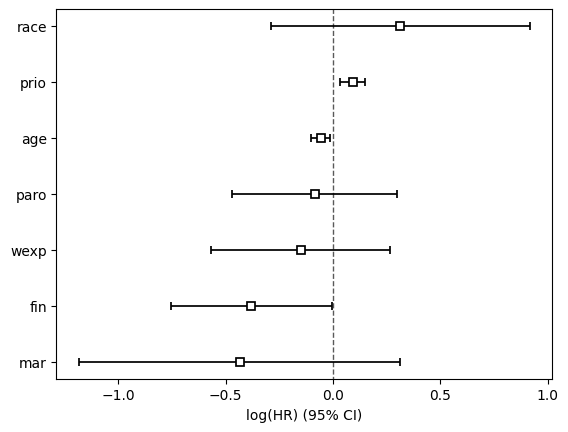

In [45]:
# 绘制
cph.plot()

In [48]:
## 比例风险假设是关系为真。
## 也就是说，风险会随时间的推移而变化，但是他们在水平之间的比率保持不变
## 数据集是否遵循这个假设？
cph.check_assumptions(rossi, p_value_threshold=0.05)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
         test_name = proportional_hazard_test

---
           test_statistic      p  -log2(p)
age  km             11.03 <0.005     10.12
     rank           11.45 <0.005     10.45
fin  km              0.02   0.89      0.17
     rank            0.02   0.90      0.15
mar  km              0.60   0.44      1.19
     rank            0.71   0.40      1.32
paro km              0.12   0.73      0.45
     rank            0.13   0.71      0.49
prio km              0.02   0.88      0.18
     rank            0.02   0.89      0.17
race km              1.44   0.23      2.12
     rank            1.43   0.23      2.11
wexp km              7.48   0.01      7.32
     rank            7.31   0.01      7.19



1. Variable 'age' failed the non-proportional test: p-value is 0.0007.

   Advice 1: the functional form of the variable 'age' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'age' using pd.cut, and then specify it in `strata=['age',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'wexp' failed the non-proportional test: p-value is 0.0063.

   Advice: with so few unique values (only 2), you can include `strata=['wexp', ...]` in the call in
`.fit`. See documentation in link [E] below.

---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/lat

[]

In [54]:
# 分层，将数据集拆分为m个小的数据集，并按分层协变量的唯一值进行分区
## 分层的协变量没有回归参数，不会显示在输出上
## 但在baseline_cumulative_hazard_ 下将存在m个基线风险
cph.fit(rossi, 'week', 'arrest', strata=['wexp'])
cph.print_summary(model='wexp in strata')

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
                   strata = wexp
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -580.89
         time fit was run = 2025-01-23 02:37:17 UTC
                    model = wexp in strata

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
fin       -0.38      0.68      0.19           -0.76           -0.01                0.47                0.99
age       -0.06      0.94      0.02           -0.10           -0.01                0.90                0.99
race       0.31      1.36      0.31           -0.30            0.91                0.74                2.49
mar       -0.45      0.64      0.38           -1.20            0.29                0.30                1.34
paro      -0.08      0.92      0.20           -0.47            0.30                0.63                1.35
prio       0.09      1.09      0.03            0.03            0.15                1.04                1.16

           cmp to     z      p  -log2(p)
covariate                               
fin          0.00 -1.99   0.05      4.42
age          0.00 -2.64   0.01      6.91
race         0.00  1.00   0.32      1.65
mar          0.00 -1.19   0.23      2.09
paro         0.00 -0.42   0.67      0.57
prio         0.00  3.16 <0.005      9.33
---
Concordance = 0.61
Partial AIC = 1173.77
log-likelihood ratio test = 23.77 on 6 df
-log2(p) of ll-ratio test = 10.77